In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
# Importing dataset
# Loading the data
raw_data = pd.read_csv('F:\\General Stuffs\\Logistic Regression\\fintrak_loan.csv',encoding='latin1')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head(5)

(7546, 17)


,ID,CustomerId,CustomerName,LoanRefNumber,AccountNumber,ProductCode,ProductName,FacilityType,CurrencyType,CBNSector,CBNClassification,CustomerType,ObligorRiskRating,LastCreditDate,ExposureType,LoanAmount,FxRate
0,63402166,26834.0,MICHAEL OKUWE,5846267,5846267,10020,PREMIUM SALARY A/C (EVERYDAY BANKING),OVERDRAFT,LCY,GENERAL,DOUBTFUL,I,6,7/21/2016,DIRECT,0.00,1.00
1,63402199,21228.0,ADAMU ATTA,1437243,1437243,50018,VISACARD - PLATINUM-DIGITAL,CREDIT CARD,FCY,GENERAL,DOUBTFUL,I,3,3/4/2020,DIRECT,0.00,365.83
2,63402224,45116.0,OLUWOLE A. MAFE,099KPLS182758772,099KPLS182758772,KPLS,RETAIL PERSONAL LOAN FCUBS,PERSONAL LOAN,LCY,GENERAL,DOUBTFUL,I,6,7/29/2016,DIRECT,1388338.91,1.00
3,63402263,53983.0,NGOZI OFILI AJUMOGOBIA,099RTIN173620501,099RTIN173620501,RTIN,RETAIL TIME LOANS NORMAL,TIME LOAN,FCY,GENERAL,DOUBTFUL,I,3,12/24/2018,DIRECT,10974900.00,365.83
4,63402302,42743.0,JOHNSON O OGUZI,099KPLS182759231,099KPLS182759231,KPLS,RETAIL PERSONAL LOAN FCUBS,PERSONAL LOAN,LCY,GENERAL,DOUBTFUL,I,3,9/11/2019,DIRECT,236793.09,1.00


In [7]:
raw_data['good_bad'] = np.where(raw_data['CBNClassification'].isin(['PERFORMING']), 0, 1)

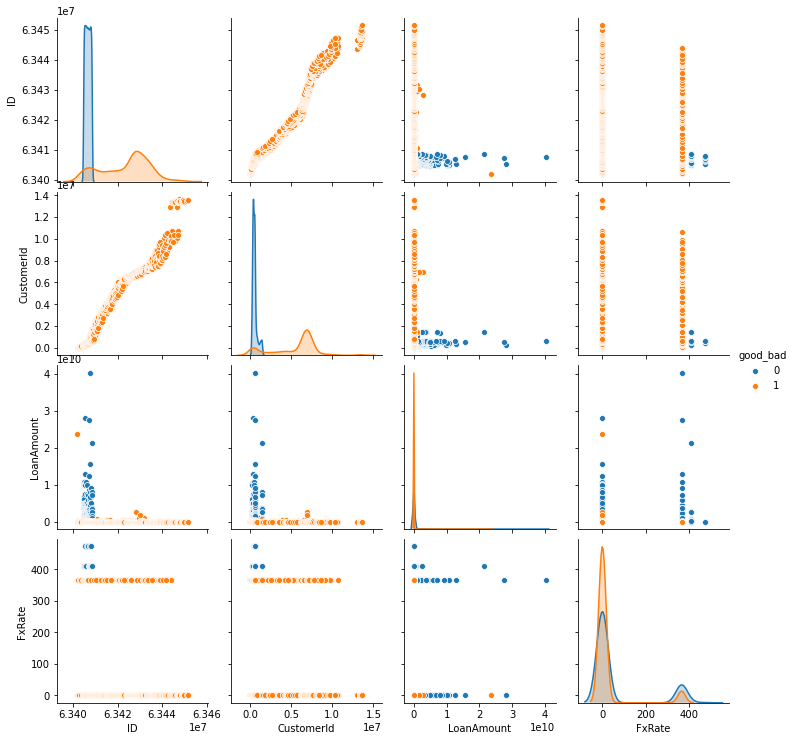

In [8]:
g = sns.pairplot(raw_data, hue = 'good_bad')

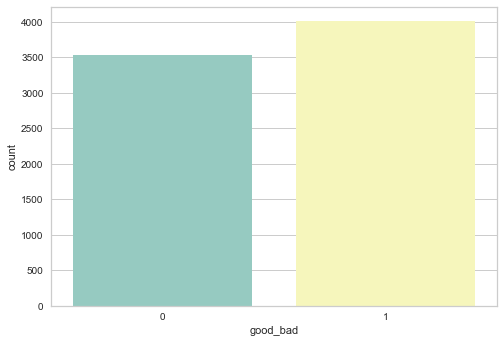

In [79]:
sns.countplot(x = 'good_bad', data = raw_data, palette = 'Set3')

In [9]:
raw_data['LastCreditDate_'] = pd.to_datetime(raw_data['LastCreditDate'], format='%m-%d-%Y', errors='ignore')
# Extracts the date and the time from a string variable that is in a given format.

In [10]:
type(raw_data['LastCreditDate_'][0])
# Checks the datatype of a single element of a column.

str

In [12]:
raw_data['LastCreditDate_']=pd.to_datetime(raw_data['LastCreditDate_'])

In [13]:
type(raw_data['LastCreditDate_'][0])
# Checks the datatype of a single element of a column.

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
# Assume we are now in December 2017
raw_data['days_since_last_credit'] = round(pd.to_numeric((pd.to_datetime('2020-07-07') - raw_data['LastCreditDate_']) / np.timedelta64(1, 'D')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.

In [15]:
raw_data['days_since_last_credit'].describe()

count     7546.000000
mean      2559.950040
std       9144.164514
min        124.000000
25%        137.000000
50%        343.000000
75%        978.000000
max      44017.000000
Name: days_since_last_credit, dtype: float64

In [16]:
#runs the first 5 rows
raw_data.head(5)

,ID,CustomerId,CustomerName,LoanRefNumber,AccountNumber,ProductCode,ProductName,FacilityType,CurrencyType,CBNSector,CBNClassification,CustomerType,ObligorRiskRating,LastCreditDate,ExposureType,LoanAmount,FxRate,good_bad,LastCreditDate_,days_since_last_credit
0,63402166,26834.0,MICHAEL OKUWE,5846267,5846267,10020,PREMIUM SALARY A/C (EVERYDAY BANKING),OVERDRAFT,LCY,GENERAL,DOUBTFUL,I,6,7/21/2016,DIRECT,0.00,1.00,1,2016-07-21,1447.0
1,63402199,21228.0,ADAMU ATTA,1437243,1437243,50018,VISACARD - PLATINUM-DIGITAL,CREDIT CARD,FCY,GENERAL,DOUBTFUL,I,3,3/4/2020,DIRECT,0.00,365.83,1,2020-03-04,125.0
2,63402224,45116.0,OLUWOLE A. MAFE,099KPLS182758772,099KPLS182758772,KPLS,RETAIL PERSONAL LOAN FCUBS,PERSONAL LOAN,LCY,GENERAL,DOUBTFUL,I,6,7/29/2016,DIRECT,1388338.91,1.00,1,2016-07-29,1439.0
3,63402263,53983.0,NGOZI OFILI AJUMOGOBIA,099RTIN173620501,099RTIN173620501,RTIN,RETAIL TIME LOANS NORMAL,TIME LOAN,FCY,GENERAL,DOUBTFUL,I,3,12/24/2018,DIRECT,10974900.00,365.83,1,2018-12-24,561.0
4,63402302,42743.0,JOHNSON O OGUZI,099KPLS182759231,099KPLS182759231,KPLS,RETAIL PERSONAL LOAN FCUBS,PERSONAL LOAN,LCY,GENERAL,DOUBTFUL,I,3,9/11/2019,DIRECT,236793.09,1.00,1,2019-09-11,300.0


In [17]:
raw_data.columns

Index(['ID', 'CustomerId', 'CustomerName', 'LoanRefNumber', 'AccountNumber',
       'ProductCode', 'ProductName', 'FacilityType', 'CurrencyType',
       'CBNSector', 'CBNClassification', 'CustomerType', 'ObligorRiskRating',
       'LastCreditDate', 'ExposureType', 'LoanAmount', 'FxRate', 'good_bad',
       'LastCreditDate_', 'days_since_last_credit'],
      dtype='object')

In [18]:
# Hold out 20% of the dataset for predicting with the final model
data = raw_data.sample(frac=0.8, random_state=1234).reset_index(drop=True)
data_unseen = raw_data.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (6037, 20)
Unseen Data For Predictions: (1509, 20)


In [19]:
# Importing module and initializing setup
from pycaret.classification  import *
dataset1 = setup(data = data, target = 'good_bad'
            
             , bin_numeric_features = ['LoanAmount','days_since_last_credit']
             , categorical_features=['ProductName', 'FacilityType', 'CurrencyType','CBNSector', 'ObligorRiskRating',
       'ExposureType']
             ,ignore_features=['ID', 'CustomerId', 'CustomerName', 'LoanRefNumber', 'AccountNumber',
       'ProductCode','LastCreditDate','CBNClassification','FxRate', 'LastCreditDate_', 'CustomerType']
            
            
            )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7965
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(6037, 20)"
4,Missing Values,True
5,Numeric Features,5
6,Categorical Features,12
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [20]:
dataset1[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6037 entries, 0 to 6036
Columns: 136 entries, ProductName_ PREMIUM CURRENT ACCOUNT to days_since_last_credit_2.0
dtypes: float64(136)
memory usage: 6.3 MB


In [21]:
dataset1[0]

,ProductName_ PREMIUM CURRENT ACCOUNT,ProductName_ SME GOLD CURRENT ACCOUNT,ProductName_ACCESS EDUCATION ENHANCEMENT SCHEME,ProductName_ACCESSPAY PAYMENTS ACCOUNT,ProductName_ACP LOAN ACCOUNT PRODUCT,ProductName_ADVANCE PAYMENT GUARANTEES,ProductName_AGRI-BUSINESS SME INVESTMENT SCHEME,ProductName_AUTO LOANS FCUBS,ProductName_BANK OF INDUSTRY FUND,ProductName_BONDS AND GUARANTEE,...,LoanAmount_3.0,LoanAmount_4.0,LoanAmount_5.0,LoanAmount_6.0,LoanAmount_7.0,LoanAmount_8.0,LoanAmount_9.0,days_since_last_credit_0.0,days_since_last_credit_1.0,days_since_last_credit_2.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ada Boost Classifier,0.839100,0.931300,0.761700,0.922200,0.834000,0.680600
1,Random Forest Classifier,0.837900,0.935100,0.777300,0.904900,0.835700,0.677500
2,Extreme Gradient Boosting,0.837600,0.932900,0.742600,0.939500,0.829000,0.678600
3,Linear Discriminant Analysis,0.836900,0.931200,0.760800,0.918900,0.832000,0.676300
4,Logistic Regression,0.836700,0.932100,0.755900,0.923300,0.830800,0.676100
5,Ridge Classifier,0.836700,0.000000,0.758100,0.921300,0.831400,0.675900
6,Gradient Boosting Classifier,0.836500,0.932700,0.745200,0.933900,0.828500,0.676100
7,Extra Trees Classifier,0.836200,0.933500,0.774600,0.903600,0.833700,0.674300
8,Light Gradient Boosting Machine,0.835000,0.935300,0.775100,0.901600,0.832900,0.671900
9,Decision Tree Classifier,0.833900,0.925000,0.770600,0.902600,0.831100,0.669700


In [23]:
lr = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8109,0.9155,0.7333,0.8919,0.8049,0.6248
1,0.8061,0.9057,0.7422,0.8743,0.8029,0.6147
2,0.8322,0.9308,0.7689,0.9010,0.8297,0.6663
3,0.8558,0.9377,0.8222,0.8981,0.8585,0.7121
4,0.8109,0.9122,0.7467,0.8796,0.8077,0.6241
5,0.8412,0.9307,0.7857,0.9026,0.8401,0.6839
6,0.8365,0.9216,0.7634,0.9144,0.8321,0.6753
7,0.8673,0.9392,0.7991,0.9421,0.8647,0.7362
8,0.8223,0.9177,0.7277,0.9209,0.8130,0.6480
9,0.8555,0.9389,0.8170,0.9015,0.8571,0.7116


In [24]:
tuned_lr = tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8227,0.9264,0.7022,0.9518,0.8082,0.6502
1,0.7967,0.9151,0.6889,0.9064,0.7828,0.5983
2,0.8298,0.9313,0.7644,0.9005,0.8269,0.6617
3,0.8605,0.9467,0.8133,0.9150,0.8612,0.7220
4,0.8180,0.9195,0.7467,0.8936,0.8136,0.6385
5,0.8318,0.9338,0.7589,0.9091,0.8273,0.6658
6,0.8365,0.9246,0.7723,0.9058,0.8337,0.6749
7,0.8531,0.9389,0.7500,0.9655,0.8442,0.7093
8,0.8199,0.9320,0.7232,0.9205,0.8100,0.6435
9,0.8365,0.9251,0.7723,0.9058,0.8337,0.6749


In [25]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

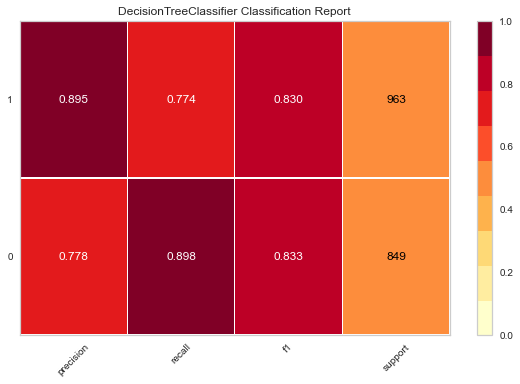

In [26]:
plot_model(tuned_lr, plot='class_report')

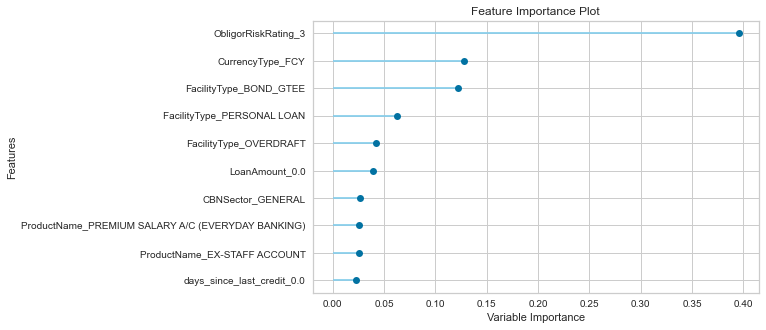

In [27]:
plot_model(tuned_lr, plot='feature')

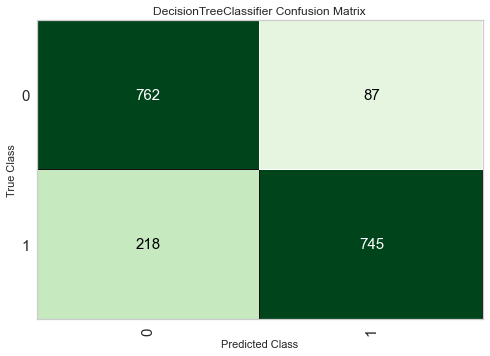

In [28]:
plot_model(tuned_lr, plot='confusion_matrix')

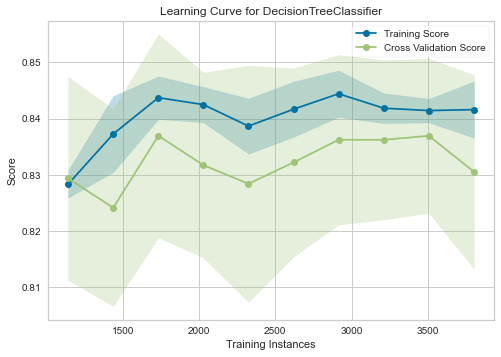

In [41]:
# Visualize the model plots
plot_model(tuned_lr, plot = 'learning')

In [29]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,0.8317,0.9355,0.7736,0.8954,0.8301,0.6651


In [30]:
holdout=predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,0.8317,0.9355,0.7736,0.8954,0.8301,0.6651


In [31]:
holdout

,ProductName_ PREMIUM CURRENT ACCOUNT,ProductName_ SME GOLD CURRENT ACCOUNT,ProductName_ACCESS EDUCATION ENHANCEMENT SCHEME,ProductName_ACCESSPAY PAYMENTS ACCOUNT,ProductName_ACP LOAN ACCOUNT PRODUCT,ProductName_ADVANCE PAYMENT GUARANTEES,ProductName_AGRI-BUSINESS SME INVESTMENT SCHEME,ProductName_AUTO LOANS FCUBS,ProductName_BANK OF INDUSTRY FUND,ProductName_BONDS AND GUARANTEE,...,LoanAmount_6.0,LoanAmount_7.0,LoanAmount_8.0,LoanAmount_9.0,days_since_last_credit_0.0,days_since_last_credit_1.0,days_since_last_credit_2.0,good_bad,Label,Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0.4437
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0.4437
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9185
1808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0.3333
1809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1.0000
1810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0000


In [32]:
final_lr = finalize_model(tuned_lr)

In [33]:
#Final Logistic Refression Machine parameters for deployment
print(final_lr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=13, max_features=78, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7965, splitter='best')


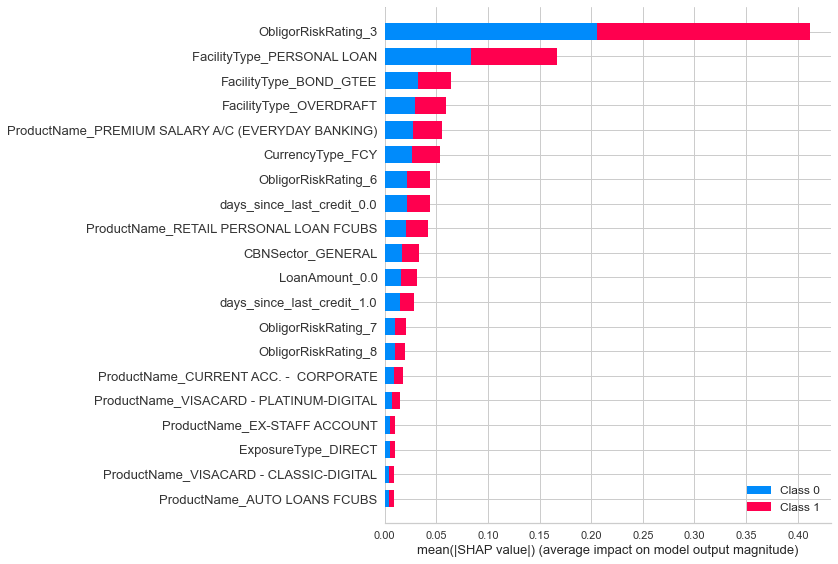

In [34]:
# Summary plot of the model (use only with tree based models)
interpret_model(tuned_lr, plot = 'summary')

In [38]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

,ID,CustomerId,CustomerName,LoanRefNumber,AccountNumber,ProductCode,ProductName,FacilityType,CurrencyType,CBNSector,...,ObligorRiskRating,LastCreditDate,ExposureType,LoanAmount,FxRate,good_bad,LastCreditDate_,days_since_last_credit,Label,Score
0,63407000,617636.0,ESTHER OLUFUNKE OLADEJI,099MPTA192130009,099MPTA192130009,MPTA,MPOWER PERSONAL LOANS AMORTIZED,PERSONAL LOAN,LCY,GENERAL,...,3,2/11/2020,DIRECT,450000.0,1.0,0,2020-02-11,147.0,1,0.5256
1,63407001,463555.0,UGO ONYEKWERE .ALEX,2876944,2876944,10002,CURRENT ACC. - INDIVIDUAL,OVERDRAFT,LCY,GENERAL,...,3,2/12/2020,DIRECT,0.0,1.0,0,2020-02-12,146.0,0,0.0345
2,63407002,463623.0,TOLULOPE OLUWAKEMI ADESOMOJU,694904561,694904561,50017,VISACARD - CLASSIC-DIGITAL,CREDIT CARD,LCY,GENERAL,...,3,3/5/2020,DIRECT,0.0,1.0,0,2020-03-05,124.0,0,0.2175
3,63407003,463834.0,JOEL TOSIN AFOLABI,1726341,1726341,10002,CURRENT ACC. - INDIVIDUAL,OVERDRAFT,LCY,GENERAL,...,3,2/10/2020,DIRECT,0.0,1.0,0,2020-02-10,148.0,0,0.0345
4,63407004,465528.0,GAMBO MOHAMMED,099MPTA192330016,099MPTA192330016,MPTA,MPOWER PERSONAL LOANS AMORTIZED,PERSONAL LOAN,LCY,GENERAL,...,3,2/14/2020,DIRECT,340000.0,1.0,0,2020-02-14,144.0,1,0.5256


In [40]:
# Calculate the final Accuracy score on the unseen test set
from sklearn.metrics import accuracy_score
from ast import literal_eval
y_true = unseen_predictions['good_bad']
y_pred = unseen_predictions['Label']
print('Our final model has an Accuracy score of:', accuracy_score(y_true, y_pred), 'on the unseen test set!')

Our final model has an Accuracy score of: 0.7892644135188867 on the unseen test set!


In [73]:
save_model(final_lr,'fintrak_deployment')

Transformation Pipeline and Model Succesfully Saved


In [74]:
loaded_pipeline = load_model('fintrak_deployment')

Transformation Pipeline and Model Sucessfully Loaded


In [75]:
print(loaded_pipeline)

[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['ProductName',
                                                            'FacilityType',
                                                            'CurrencyType',
                                                            'CBNSector',
                                                            'ObligorRiskRating',
                                                            'ExposureType'],
                                      display_types=True,
                                      features_todrop=['ID', 'CustomerId',
                                                       'CustomerName',
                                                       'LoanRefNumber',
                                                       'AccountNumber',
                                                       'ProductCode',
                                                       'LastCreditDate',
 